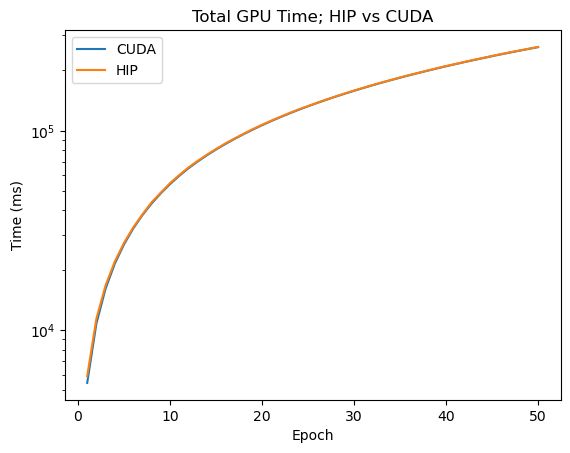

In [49]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

begin = 1
end = 50

filename_dict = {
    'CUDA': "cuda.out",
    'HIP': "hip.out",
}

xticks = range(begin, end + 1)


def read_times(filename):
    result = []
    with open(filename) as f:
        f.readline()
        for _ in xticks:
            temp_str = f.readline()
            result.append(float(temp_str.split(",")[1].split(":")[1]))

    return result


def read_and_plot(key):
    time = read_times(filename_dict[key])
    plt.plot(xticks, time, "-", label=key)
    


with PdfPages("scalaing plot-gpu time.pdf") as pdf:
    for key in filename_dict:
        read_and_plot(key)

    plt.title("Total GPU Time; HIP vs CUDA")
    plt.xlabel("Epoch")
    plt.ylabel("Time (ms)")
    plt.yscale("log")
    plt.xticks([0, 10, 20, 30, 40, 50])
    plt.legend()

    pdf.savefig()

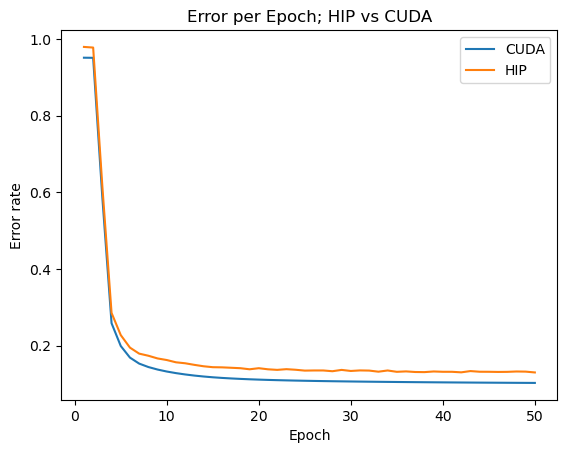

In [42]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

begin = 1
end = 50

filename_dict = {
    'CUDA': "cuda.out",
    'HIP': "hip.out",
}

xticks = range(begin, end + 1)

def read_times(filename):
    result = []
    with open(filename) as f:
        f.readline()
        for _ in xticks:
            temp_str = f.readline()
            result.append(float(temp_str.split(",")[0].split(":")[1]))

    return result


def read_and_plot(key):
    time = read_times(filename_dict[key])
    plt.plot(xticks, time, "-", label=key)
    


with PdfPages("scalaing plot-error.pdf") as pdf:
    for key in filename_dict:
        read_and_plot(key)

    plt.title("Error per Epoch; HIP vs CUDA")
    plt.xlabel("Epoch")
    plt.ylabel("Error rate")
    plt.xticks([0, 10, 20, 30, 40, 50])
    plt.legend()

    pdf.savefig()